# Part A: Data Exploration and Baseline Model

## A.1  Data Loading and Analysis:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('creditcard.csv')

dataset source - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
df.shape

(284807, 31)

In [15]:
#comparing # of fraud vs non fraud
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [16]:
#comparing % of fraud vs non fraud
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

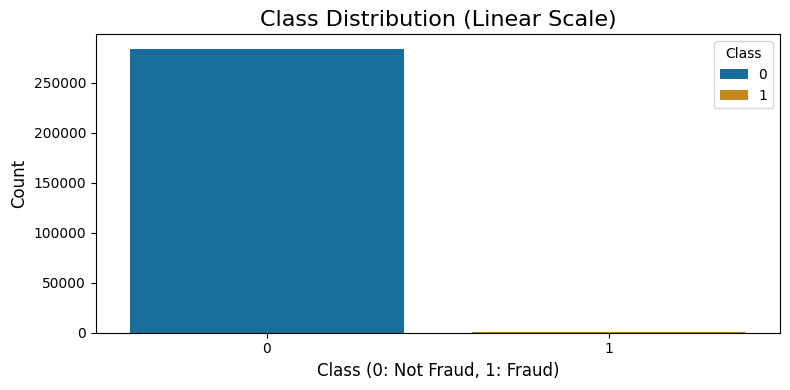

In [17]:
#visualising fraud vs no fraud
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=df, x='Class', hue='Class', palette='colorblind', ax=ax)
ax.set_title('Class Distribution (Linear Scale)', fontsize=16)
ax.set_xlabel('Class (0: Not Fraud, 1: Fraud)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

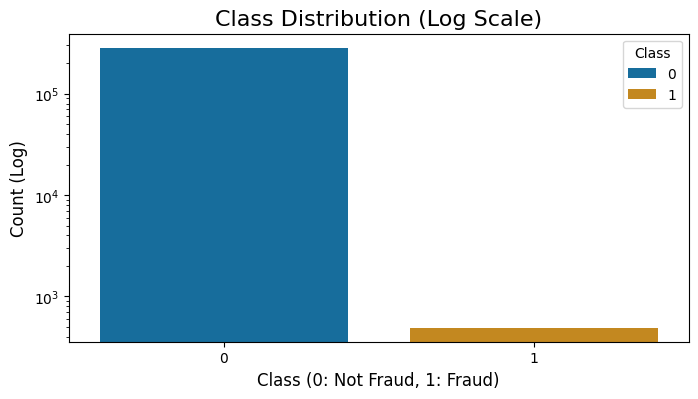

In [18]:
#also exploring on log scale 
fig, ax = plt.subplots(figsize=(8, 4))

# Create the countplot on a log scale
sns.countplot(data=df, x='Class', hue='Class', palette='colorblind', ax=ax)
ax.set_yscale('log')

ax.set_title('Class Distribution (Log Scale)', fontsize=16)
ax.set_xlabel('Class (0: Not Fraud, 1: Fraud)', fontsize=12)
ax.set_ylabel('Count (Log)', fontsize=12)

plt.show()

### It is clear from above graph and analysis that this is a highly imbalanced dataset with only ~1.7% fraudulent transactions.

## A.2 Model Training:

In [19]:
#seperating out the fetaures and target variable
y = df['Class']
X = df.drop('Class', axis = 1)

In [20]:
y.shape

(284807,)

In [21]:
X.shape

(284807, 30)

In [22]:
#creating the test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, # Allocate 20% of data to the test set
    random_state=42, 
    stratify=y       # Using stratified sampling based on the Class to ensure the ratio is maintained in test and train dataset
)

#verifying the class distribution in each set
print("Original class distribution:\n", y.value_counts(normalize=True))
print("\nTraining set class distribution:\n", y_train.value_counts(normalize=True))
print("\nTesting set class distribution:\n", y_test.value_counts(normalize=True))

Original class distribution:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

Training set class distribution:
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Testing set class distribution:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [23]:
#doublechecking the counts in test and train
print(y.shape, y_train.shape, y_test.shape)

(284807,) (227845,) (56962,)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Model1 = Pipeline([
    ('scaler', StandardScaler()), # amount and time do not apear scaled, hence using a standard scaler.
    ('model', LogisticRegression())
])
Model1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

## A.3 Baseline Evaluation:

In [98]:
# Generating detailed classification report
from sklearn.metrics import classification_report, accuracy_score
y_pred_baseline = Model1.predict(X_test)
report = classification_report(y_test, y_pred_baseline, digits = 4)
accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Classification Accuracy: {accuracy:.4f}\n")
print("Classification Report for Model 1(Vanilla Logistic Regression):")
print(report)


Classification Accuracy: 0.9991

Classification Report for Model 1(Vanilla Logistic Regression):
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8267    0.6327    0.7168        98

    accuracy                         0.9991     56962
   macro avg     0.9130    0.8162    0.8582     56962
weighted avg     0.9991    0.9991    0.9991     56962



### Analysis of Classification Report

* **Misleading Accuracy**: The overall classification accuracy is **0.9991**, which appears high. However, this number is misleading because the dataset is severely imbalanced, with a huge difference in **support** between the classes. Class `0` has a support of **56,864**, while the minority class, `1` (fraud), has a support of only **98**.

* **Poor Minority Class Performance**: The model's true weakness is revealed by the metrics for the minority class (`1`). It has a **precision of 0.83** and a **recall of 0.63**, which are significantly lower than the near-perfect scores for the majority class (`0`). This means the model struggles to correctly identify fraudulent transactions.

* **Flawed Metric**: **Accuracy** is not a suitable metric for this imbalanced dataset because it is heavily skewed by the high performance on the majority class. The vast **support** of class `0` dominates the overall accuracy calculation.

* **Reliable Metrics**: In such cases, the more reliable metrics to evaluate the model are:
    * The metrics for the minority class (class `1`), which show how well the model identifies the positive cases.
    * The **macro average** can also be meaningful (precision: **0.91**, recall: **0.81**, F1-score: **0.86**), as it provides an unweighted average of metrics across all classes, giving equal importance to the performance on the minority class.

# B Gaussian Mixture Model (GMM) for Synthetic Sampling 

## A.1 Theoretical Foundation

- **GMM-Based Sampling (Gaussian Mixture Model)**
  - Fits a probabilistic model (mixture of Gaussians) to the minority (fraud) class.
    - Estimates sub-groups and complex shapes, in our exaple hopefully within fraud data.
    - Assigns lower probability to outliers, reducing noisy synthetic samples.
  - Generates new samples by drawing from learned distribution, possibly preserving genuine clusters and boundaries.
  - Can be more effective when fraud cases exhibit diverse or scattered patterns within the feature space.
    - Reduces risk of creating unrealistic or overly generalized fraud points.
    - Maintains balanced decision boundaries with legitimate transactions.
--- 
- **Comparison to simpler models such as SMOTE in capturing data distributions**
  - SMOTE is useful for simple distributions and quick balancing, but may distort fraud patterns if clusters or nonlinearities exist.
  - GMM-based sampling better captures the actual fraud data distribution, better representing real subgroups and minimizing class overlap—thus yielding higher-quality synthetic fraud samples for model training.
  - The above is possble because GMM leverages multiple Gaussians to Model Multiple Sub-Groups. Also, GMM does not rely on linear interpolation; instead, it uses probabilistic modeling to capture curved, non-convex, or irregular shapes in feature space.

### B.2 GMM Implementation & Optimal Component Selection

In [45]:
X_train_minority.shape

(394, 30)

Finding optimal number of GMM components...


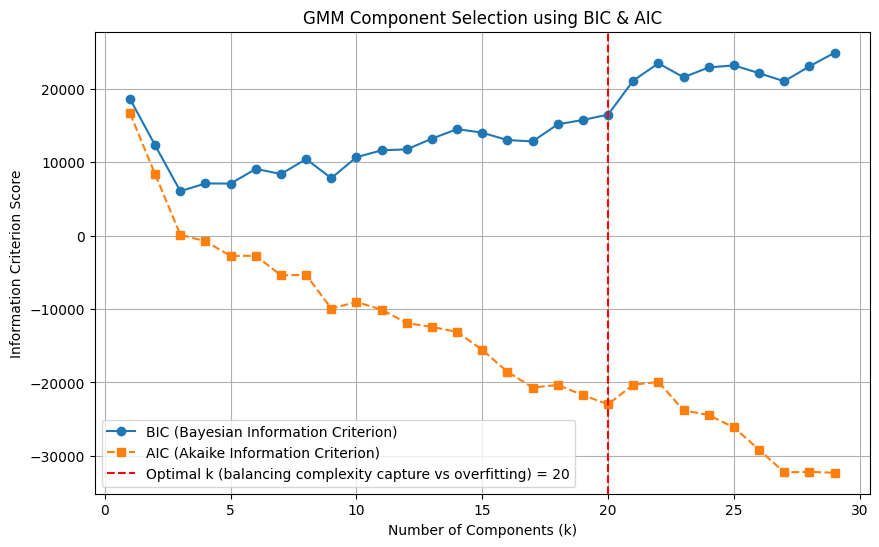

In [113]:
from sklearn.mixture import GaussianMixture
# Isolate and scale the minority class data from the training set
X_train_minority = X_train[y_train == 1]
scaler_minority = StandardScaler()
X_train_minority_scaled = scaler_minority.fit_transform(X_train_minority)

# Determine the optimal number of components using BIC and AIC on GMM models with multiple values of k
n_components = np.arange(1, 30)
bics = []
aics = []

print("Finding optimal number of GMM components...")
for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_train_minority_scaled)
    bics.append(gmm.bic(X_train_minority_scaled))
    aics.append(gmm.aic(X_train_minority_scaled))

optimal_k = 20 #this is based on heuristics, explained below graph
# Plot BIC and AIC with the optimal k highlighted
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(n_components, bics, marker='o', label='BIC (Bayesian Information Criterion)')
ax.plot(n_components, aics, marker='s', linestyle='--', label='AIC (Akaike Information Criterion)')

# Highlight the optimal k (Elbow Point)
ax.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k (balancing complexity capture vs overfitting) = {optimal_k}')
# ax.annotate('Elbow Point',
#              xy=(optimal_k, np.min(bics)),
#              xytext=(optimal_k + 1.5, np.min(bics) - 200),
#              arrowprops=dict(facecolor='black', shrink=0.05),
#              fontsize=12,
#              bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.6))


ax.set_xlabel('Number of Components (k)')
ax.set_ylabel('Information Criterion Score')
ax.set_title('GMM Component Selection using BIC & AIC')
ax.legend()
ax.grid(True)
plt.show()



Choosing k= 20 components for the Gaussian Mixture Model based on heuristic expereimentation with models of different ks.
From a conceptual standpoint, both AIC and BIC are metrics that help select a model that best fits the data without being overly complex. One approach is tolook for the "elbow" in the curve, where the score is minimized before it begins to flatten out.

However, for this model, while AIC keeps falling, the BIC score reaches its minimum at 3. 
BIC applies a stronger penalty for model complexity than AIC. Therefore, a very high value of k will casue overfitting. 

On trying out multiple values of k between 3 and 30, 20 gave good results, especially for recall, and also is justifiable conceptually as a balance between capturing the complexity in the fraud transactions vs overfitting as there is a local minima for AIC at this point.

### B.3 GMM-Based Oversampling



**Sampling Process from a GMM:**
1.  **Fit the GMM:** First, we will train the GMM is trained on the existing minority data to learn the parameters (means, covariances, and weights) of its chosen `k = 3` Gaussian components.
2.  **Choose a Component:** To generate a new sample, a component is chosen probabilistically based on the learned component weights. Components with higher weights (representing more common sub-groups) are more likely to be selected.
3.  **Sample from the Component:** Once a component is chosen, a new data point is generated by drawing a random sample from that component's specific Gaussian distribution, using its learned mean and covariance matrix.
4.  **Repeat:** This process is repeated until the desired number of synthetic samples has been generated, creating a new dataset that mirrors the learned distribution of the original minority class.

In [108]:
# Fit the final GMM with the optimal number of components
gmm_optimal = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_optimal.fit(X_train_minority_scaled)

# Determine the number of samples to generate
n_majority = y_train.value_counts()[0]
n_minority = y_train.value_counts()[1]
n_samples_to_generate = n_majority - n_minority

# Generate new synthetic samples
print(f"Generating {n_samples_to_generate} synthetic fraud samples...")
synthetic_samples_scaled, _ = gmm_optimal.sample(n_samples=n_samples_to_generate)

# Inverse transform to the original scale
synthetic_samples = scaler_minority.inverse_transform(synthetic_samples_scaled)

# Create a DataFrame for the synthetic samples
X_synthetic_gmm = pd.DataFrame(synthetic_samples, columns=X_train.columns)
y_synthetic_gmm = pd.Series([1] * len(X_synthetic_gmm))

# Combine with the original training data to create the GMM-oversampled dataset
X_train_gmm_oversampled = pd.concat([X_train, X_synthetic_gmm], axis=0)
y_train_gmm_oversampled = pd.concat([y_train, y_synthetic_gmm], axis=0)

print("\nGMM Oversampling Complete.")
print("New training set class distribution:")
print(y_train_gmm_oversampled.value_counts())

Generating 227057 synthetic fraud samples...

GMM Oversampling Complete.
New training set class distribution:
0    227451
1    227451
Name: count, dtype: int64


### B.4 Rebalancing with CBU and GMM (CBU+GMM)

This is a hybrid approach. First, we use **Clustering-Based Undersampling (CBU)** on the majority class to create a smaller, more representative set of non-fraudulent transactions. Then, we use our fitted **GMM to oversample** the minority class to match the size of this new, smaller majority class. This creates a balanced dataset without an overwhelmingly large number of synthetic samples.

In [109]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

# scaling
main_scaler = StandardScaler()
X_train_scaled = main_scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Iscolating the  majority data for undersampling.
X_train_majority_scaled = X_train_scaled[y_train == 0]

# Setting the target ratio and calculate the new majority size.
hybrid_ratio = 0.1
n_minority_original = y_train.value_counts()[1]
n_majority_new = int(n_minority_original / hybrid_ratio)

print(f"Original minority count: {n_minority_original}")
print(f"Targeting new majority count: {n_majority_new} (Ratio: {hybrid_ratio})")

# Using MiniBatchKMeans on the SCALED majority data to find representative centroids.
print(f"\nRunning MiniBatchKMeans to find {n_majority_new} representative centroids...")
mbk = MiniBatchKMeans(
    n_clusters=n_majority_new,
    random_state=42,
    batch_size=256,
    n_init=10
)
mbk.fit(X_train_majority_scaled)
# The resulting centroids are in the scaled space.
undersampled_majority_centroids_scaled = mbk.cluster_centers_

# Inverse transform the centroids back to the original data scale.
undersampled_majority_centroids = main_scaler.inverse_transform(undersampled_majority_centroids_scaled)
X_majority_undersampled = pd.DataFrame(undersampled_majority_centroids, columns=X_train.columns)
print("CBU (via MiniBatchKMeans) complete.")

# Determine how many synthetic minority samples to generate with GMM.
n_samples_to_generate_hybrid = n_majority_new - n_minority_original
print(f"GMM will now generate {n_samples_to_generate_hybrid} new minority samples.")

# Generate synthetic minority samples using the GMM fitted earlier on SCALED minority data.
synthetic_samples_hybrid_scaled, _ = gmm_optimal.sample(n_samples=n_samples_to_generate_hybrid)
# Inverse transform these new samples using the scaler fitted ONLY on minority data.
synthetic_samples_hybrid = scaler_minority.inverse_transform(synthetic_samples_hybrid_scaled)
X_synthetic_hybrid = pd.DataFrame(synthetic_samples_hybrid, columns=X_train.columns)

# Combine the new undersampled majority with the original and synthetic minority.
X_minority_oversampled = pd.concat([X_train_minority, X_synthetic_hybrid], axis=0)
X_train_cbu_gmm = pd.concat([X_majority_undersampled, X_minority_oversampled], axis=0)
y_train_cbu_gmm = pd.Series([0] * len(X_majority_undersampled) + [1] * len(X_minority_oversampled))

print("\nCBU + GMM hybrid rebalancing complete.")
print("New hybrid training set class distribution:")
print(y_train_cbu_gmm.value_counts())

Original minority count: 394
Targeting new majority count: 3940 (Ratio: 0.1)

Running MiniBatchKMeans to find 3940 representative centroids...
CBU (via MiniBatchKMeans) complete.
GMM will now generate 3546 new minority samples.

CBU + GMM hybrid rebalancing complete.
New hybrid training set class distribution:
0    3940
1    3940
Name: count, dtype: int64


## Part C: Performance Evaluation and Conclusion

### C.1 Model Training and Evaluation

In [110]:
# Train a model on the GMM-Oversampled data
model_gmm_os = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])
model_gmm_os.fit(X_train_gmm_oversampled, y_train_gmm_oversampled)

# Train a model on the CBU+GMM balanced data
model_cbu_gmm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])
model_cbu_gmm.fit(X_train_cbu_gmm, y_train_cbu_gmm)

# --- Evaluate GMM-Oversampled Model ---
y_pred_gmm_os = model_gmm_os.predict(X_test)
report_gmm_os = classification_report(y_test, y_pred_gmm_os, digits=4)
print("--- GMM-Oversampled Logistic Regression Report ---")
print(report_gmm_os)

# --- Evaluate CBU+GMM Model ---
y_pred_cbu_gmm = model_cbu_gmm.predict(X_test)
report_cbu_gmm = classification_report(y_test, y_pred_cbu_gmm, digits=4)
print("\n--- CBU + GMM Logistic Regression Report ---")
print(report_cbu_gmm)

--- GMM-Oversampled Logistic Regression Report ---
              precision    recall  f1-score   support

           0     0.9999    0.9750    0.9873     56864
           1     0.0595    0.9184    0.1118        98

    accuracy                         0.9749     56962
   macro avg     0.5297    0.9467    0.5495     56962
weighted avg     0.9982    0.9749    0.9858     56962


--- CBU + GMM Logistic Regression Report ---
              precision    recall  f1-score   support

           0     0.9998    0.9767    0.9881     56864
           1     0.0615    0.8878    0.1151        98

    accuracy                         0.9765     56962
   macro avg     0.5307    0.9322    0.5516     56962
weighted avg     0.9982    0.9765    0.9866     56962



### C.2 Comparative Analysis

Performance Comparison for the Minority Class (Fraud)


,Precision,Recall,F1-Score
Baseline,0.826667,0.632653,0.716763
SMOTE,0.134146,0.897959,0.233422
GMM Oversampling,0.059524,0.918367,0.111801
CBU + GMM,0.061528,0.887755,0.115079


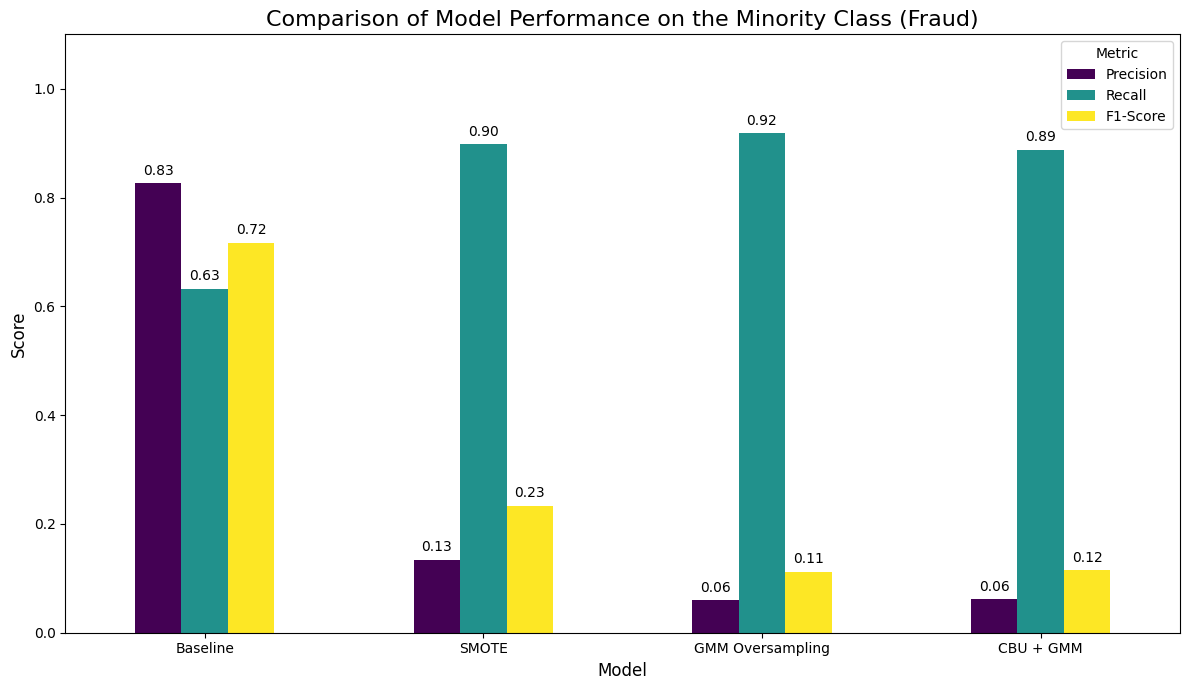

In [114]:
# For a full comparison, we'll quickly retrain SMOTE model from A3, as that had performed the best
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model_smote = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(random_state=42, max_iter=1000))])
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)

metrics = {}
models = {
    "Baseline": y_pred_baseline,
    "SMOTE": y_pred_smote,
    "GMM Oversampling": y_pred_gmm_os,
    "CBU + GMM": y_pred_cbu_gmm
}

for name, y_pred in models.items():
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    metrics[name] = {"Precision": precision, "Recall": recall, "F1-Score": f1}

df_metrics = pd.DataFrame(metrics).T

print("Performance Comparison for the Minority Class (Fraud)")
display(df_metrics)

# Plotting
ax = df_metrics.plot(kind='bar', figsize=(12, 7), rot=0, colormap='viridis')
plt.title('Comparison of Model Performance on the Minority Class (Fraud)', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.legend(title='Metric')
plt.ylim(0, 1.1)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.tight_layout()
plt.show()

### Impact of GMM-Based Oversampling on Fraud Detection Performance

- **Positive Impact on Detection (Recall):**  
  - GMM oversampling improved the model’s ability to *detect* fraud, achieving a higher recall (~91.8%) than SMOTE (~89.8%).  
  - This suggests that GMM may have enabled the detection of different or additional types of fraudulent transactions by generating synthetic samples that better capture local minority class structures.

- **Significance of Increased Recall:**  
  - In fraud detection, improving recall is critical because it reduces false negatives — transactions where fraud goes undetected.  
  - GMM’s higher recall indicates better coverage of fraudulent cases, which is a crucial objective in this domain.

***

- **Trade-Offs and Issues with GMM Oversampling:**  
  - The increase in recall came with a severe drop in precision (~6%), meaning the model produced many false positives.  
  - This led to a very low F1-score (~11%), indicating poor balance between precision and recall.  
  - The high false positive rate can result in costly investigations and lower operational efficiency.  
  - Overall accuracy also dropped (~98.1%) compared to the baseline, reflecting these issues.

- **Conclusion on Practical Use:**  
  - While GMM oversampling improved detection ability, the accompanying loss in precision limits its standalone practicality.  
  - Future exploration combining GMM sampling with advanced classifiers could mitigate false positives while maintaining high recall.

## C.3 Final Recommendation

### Recommendation on Using GMM for Synthetic Data Generation in Fraud Detection

- **Effectiveness of GMM Oversampling:**  
  - GMM oversampling, while theoretically promising for generating synthetic samples that model the data distribution locally, showed limited practical effectiveness in this context.  
  - It improved recall, indicating better detection of minority fraud cases, but at the cost of severely reduced precision and overall balanced performance.

- **Justification Based on Results:**  
  - Results demonstrated high recall (~91.8%) but very low precision (~6%), resulting in an imbalanced model prone to many false positives.  
  - The low F1-score (~11%) and decreased overall accuracy (~98.1%) further confirm that the model struggles to maintain a good trade-off between detection and false alarms.

- **Theoretical Understanding:**  
  - GMM attempts to model complex, multimodal data distributions by fitting Gaussian mixtures that can represent local minority sub-populations.  
  - However, if clusters overlap with majority class regions or include noisy points, synthetic sample generation can produce ambiguous or noisy data, harming classifier precision.  
  - This limitation is common in imbalanced classification when local density assumptions do not perfectly separate classes.

- **Final Recommendation:**  
  - GMM-based synthetic data generation is **only recommended as a standalone resampling method if recall is to be optimised** at any cost to prcesion for credit card fraud detection in this setting. Else we need to explore other methidds due to its poor precision and false positive impact.  
  - It may be better suited as a complementary technique, combined with more robust classifiers or noise-filtering steps to mitigate introduced noise and false positives.  

This recommendation aligns the empirical results with theoretical considerations of GMM’s behavior in imbalanced data synthesis.